In [2]:
#Import Data Manipulation Libraries

import pandas as pd
import numpy as np

#Importing Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Import Filter Working Libraries
import warnings
warnings.filterwarnings('ignore')
#Import logging
import logging
logging.basicConfig(level=logging.INFO,
                    filemode = 'w',
                    filename = 'model.log',
                    format = '%(asctime)s- %(levelname)s - %(message)s',Force =True)
                
# Import Filterwarning Library
import warnings
warnings.filterwarnings('ignore')


In [3]:
url = 'https://raw.githubusercontent.com/vinnithakur/BostonPricePrediction_Model/refs/heads/main/housing.data'

df=pd.read_csv(url,sep = "\s+")

df.sample(frac=1)

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
193,0.01439,60.0,2.93,0,0.4010,6.604,18.8,6.2196,1,265.0,15.6,376.70,4.38,29.1
279,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216.0,14.9,387.31,3.76,45.4
11,0.09378,12.5,7.87,0,0.5240,5.889,39.0,5.4509,5,311.0,15.2,390.50,15.71,21.7
470,4.03841,0.0,18.10,0,0.5320,6.229,90.7,3.0993,24,666.0,20.2,395.33,12.87,19.6
493,0.27957,0.0,9.69,0,0.5850,5.926,42.6,2.3817,6,391.0,19.2,396.90,13.59,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,4.09740,0.0,19.58,0,0.8710,5.468,100.0,1.4118,5,403.0,14.7,396.90,26.42,15.6
379,88.97620,0.0,18.10,0,0.6710,6.968,91.9,1.4165,24,666.0,20.2,396.90,17.21,10.4
172,0.09178,0.0,4.05,0,0.5100,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04,23.6
7,0.21124,12.5,7.87,0,0.5240,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5


In [4]:
headers =['CRIM', 'ZN','INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
df.columns=headers

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [7]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     5 non-null      float64
 1   ZN       5 non-null      float64
 2   INDUS    5 non-null      float64
 3   CHAS     5 non-null      int64  
 4   NOX      5 non-null      float64
 5   RM       5 non-null      float64
 6   AGE      5 non-null      float64
 7   DIS      5 non-null      float64
 8   RAD      5 non-null      int64  
 9   TAX      5 non-null      float64
 10  PTRATIO  5 non-null      float64
 11  B        5 non-null      float64
 12  LSTAT    5 non-null      float64
 13  MEDV     5 non-null      float64
dtypes: float64(12), int64(2)
memory usage: 692.0 bytes


In [8]:
#Checking Univariate Descriptive Stats
from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Minimum' :df[i].min(),
        'Maximum' :df[i].max(),
        'Mean': df[i].max(),
        'Median' :df[i].median(),
        'Standard Deviation' :df[i].std(),
        'Range':df[i].max() - df[i].min(),
        'Skewness':df[i].skew(),
        'Kurtosis' : df[i].kurt(),
        
        
    })
    
    stats.append(numerical_stats)
    
    report = pd.DataFrame(stats)
    
report

,Feature,Minimum,Maximum,Mean,Median,Standard Deviation,Range,Skewness,Kurtosis
0,CRIM,0.00906,88.9762,88.9762,0.25915,8.608572,88.96714,5.218396,37.062371
1,ZN,0.00000,100.0000,100.0000,0.00000,23.343704,100.00000,2.225665,4.024979
2,INDUS,0.46000,27.7400,27.7400,9.69000,6.855868,27.28000,0.292762,-1.233876
3,CHAS,0.00000,1.0000,1.0000,0.00000,0.254227,1.00000,3.401726,9.609780
4,NOX,0.38500,0.8710,0.8710,0.53800,0.115990,0.48600,0.727784,-0.071076
5,RM,3.56100,8.7800,8.7800,6.20800,0.703195,5.21900,0.405743,1.886456
6,AGE,2.90000,100.0000,100.0000,77.70000,28.176371,97.10000,-0.599111,-0.971074
7,DIS,1.12960,12.1265,12.1265,3.19920,2.107757,10.99690,1.011674,0.482447
8,RAD,1.00000,24.0000,24.0000,5.00000,8.707553,23.00000,1.002744,-0.872990
9,TAX,187.00000,711.0000,711.0000,330.00000,168.629992,524.00000,0.666800,-1.146763


In [9]:
# sns.pairplot(df);

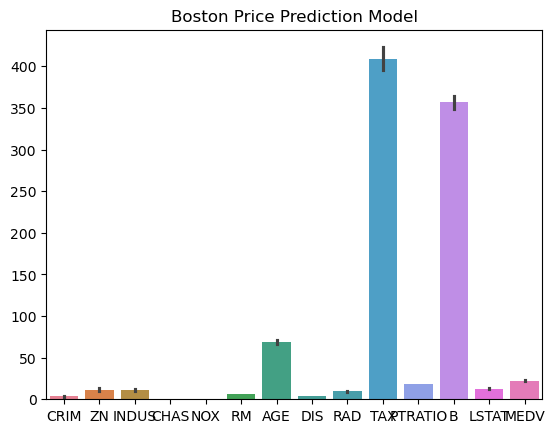

In [10]:
sns.barplot(df)
plt.title('Boston Price Prediction Model')
plt.show()


In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [12]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop(["MEDV"],axis=1)
y=df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [13]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200283,0.406251,-0.056132,0.420934,-0.218978,0.352701,-0.379627,0.625396,0.582568,0.289394,-0.384839,0.455329,-0.388249
ZN,-0.200283,1.000000,-0.534022,-0.042550,-0.516574,0.311835,-0.569524,0.664395,-0.311717,-0.314351,-0.391713,0.175319,-0.412894,0.360393
INDUS,0.406251,-0.534022,1.000000,0.062350,0.764556,-0.391330,0.645543,-0.708848,0.594167,0.720561,0.380955,-0.356506,0.602737,-0.484126
CHAS,-0.056132,-0.042550,0.062350,1.000000,0.091134,0.091497,0.086461,-0.099109,-0.007907,-0.035965,-0.122570,0.049040,-0.054576,0.175364
NOX,0.420934,-0.516574,0.764556,0.091134,1.000000,-0.302127,0.731461,-0.769221,0.611758,0.668141,0.188918,-0.380006,0.591262,-0.427295
RM,-0.218978,0.311835,-0.391330,0.091497,-0.302127,1.000000,-0.240211,0.205170,-0.209277,-0.291680,-0.355116,0.127754,-0.613734,0.695365
AGE,0.352701,-0.569524,0.645543,0.086461,0.731461,-0.240211,1.000000,-0.747872,0.456232,0.506527,0.261724,-0.273486,0.602782,-0.376932
DIS,-0.379627,0.664395,-0.708848,-0.099109,-0.769221,0.205170,-0.747872,1.000000,-0.494798,-0.534492,-0.232561,0.291451,-0.497277,0.249896
RAD,0.625396,-0.311717,0.594167,-0.007907,0.611758,-0.209277,0.456232,-0.494798,1.000000,0.910202,0.463322,-0.444065,0.487608,-0.381690
TAX,0.582568,-0.314351,0.720561,-0.035965,0.668141,-0.291680,0.506527,-0.534492,0.910202,1.000000,0.460100,-0.441505,0.543435,-0.468543


In [14]:
scalar= MinMaxScaler()

X_train= scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train,y_train)

y_pred_LR = LR.predict(X_test)
r2_pred_LR = r2_score(y_test,y_pred_LR)
print(round(r2_pred_LR*100,2),"%")

65.22 %


In [16]:
from sklearn.tree import DecisionTreeRegressor
DTR= DecisionTreeRegressor()
DTR.fit(X_train,y_train)
y_pred_DTR = DTR.predict(X_test)
r2_score_DTR = r2_score(y_test,y_pred_DTR)
print(round(r2_score_DTR*100,2),"%")

61.32 %


In [18]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor()
RF.fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)
R2_score_RF = r2_score(y_test,y_pred_RF)

print(round(R2_score_RF*100,2),"%")

84.69 %


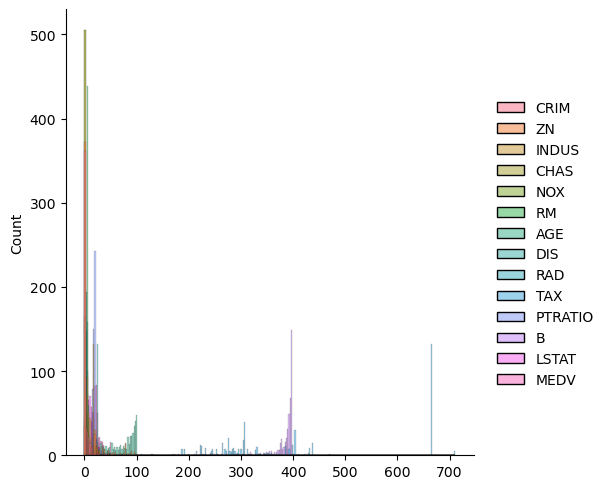

In [19]:
sns.displot(df)


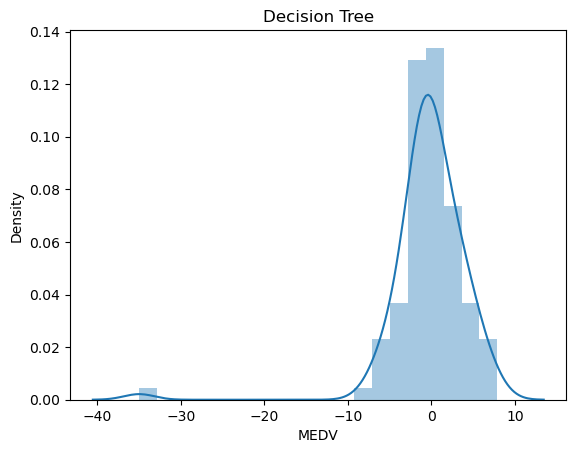

In [20]:
sns.distplot(y_test - y_pred_DTR, bins=20)
plt.title("Decision Tree")
plt.show()

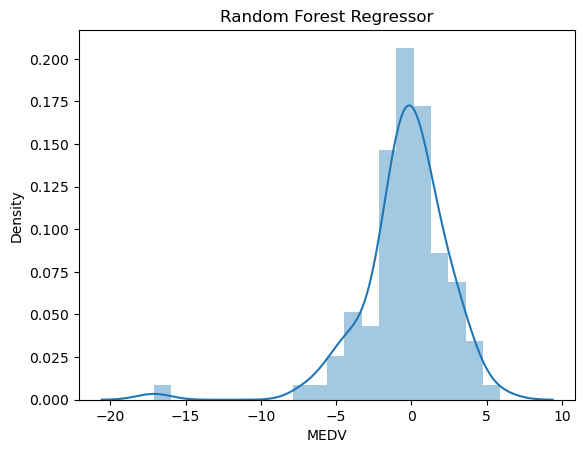

In [21]:
sns.distplot(y_test - y_pred_RF, bins=20)
plt.title("Random Forest Regressor")
plt.show()